In [1]:
# install dependencies
!pip install pytesseract opencv-python pillow matplotlib

In [2]:
# load and preprocess image
import re
import cv2
import pytesseract
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

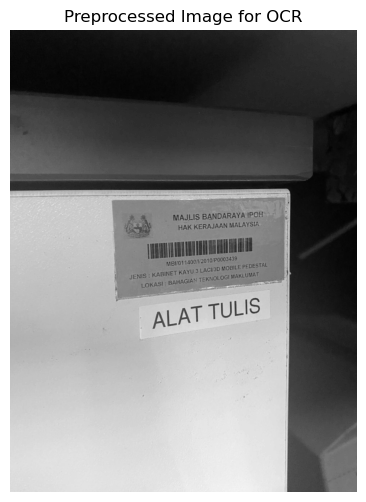

In [6]:
# load image 
image_path = "sticker.jpeg"
image = cv2.imread(image_path)

# set path to Tesseract
pytesseract.pytesseract.tesseract_cmd = r'C:\Users\athirah\AppData\Local\Programs\Tesseract-OCR\tesseract.exe'

# convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# use morphological operations to enhance text detection
kernel = np.ones((2, 2), np.uint8)
gray = cv2.morphologyEx(gray, cv2.MORPH_CLOSE, kernel)

# show preprocessed image
plt.figure(figsize = (8, 6))
plt.imshow(gray, cmap = "gray")
plt.title("Preprocessed Image for OCR")
plt.axis("off")
plt.show()

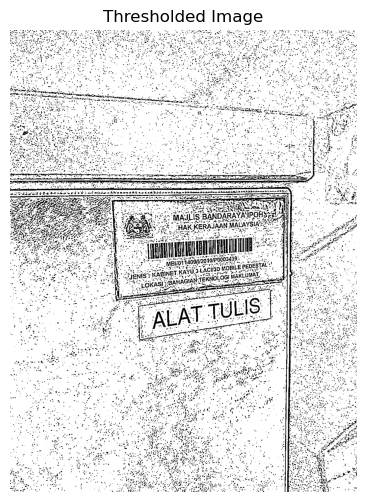

In [7]:
# apply adaptive thresholding
thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                               cv2.THRESH_BINARY, 11, 2)

# show preprocessed image
plt.figure(figsize = (8, 6))
plt.imshow(thresh, cmap = "gray")
plt.title("Thresholded Image")
plt.axis("off")
plt.show()

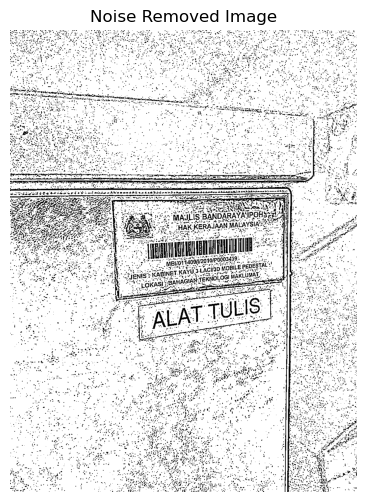

In [8]:
# apply bilateral filter to remove noise whioe keeping edges sharp
filtered = cv2.bilateralFilter(thresh, 9, 75, 75)

# show preprocessed image
plt.figure(figsize = (8, 6))
plt.imshow(filtered, cmap = "gray")
plt.title("Noise Removed Image")
plt.axis("off")
plt.show()

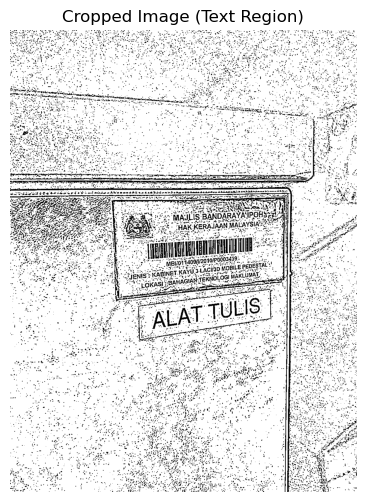

In [9]:
# find contours in image
contours, _ = cv2.findContours(filtered, cv2.RETR_EXTERNAL, 
                               cv2.CHAIN_APPROX_SIMPLE)

# get the bounding box of the largest contour
largest_contour = max(contours, key = cv2.contourArea)
x, y, w, h = cv2.boundingRect(largest_contour)

# crop image to the detcted text region
cropped = filtered[y : y + h, x : x + w]

# show preprocessed image
plt.figure(figsize = (8, 6))
plt.imshow(cropped, cmap = "gray")
plt.title("Cropped Image (Text Region)")
plt.axis("off")
plt.show()

In [10]:
# perform OCR
custom_config = r'--oem 3 --psm 6' # optimize for structured text
extracted_text = pytesseract.image_to_string(gray)
print("Extracted Text:\n", extracted_text)

Extracted Text:
 _ MAJLIS BANDARAYA IPOH.
HAK KERAJAAN MALAYSIA

~~ uu

MBI01 44go1l/2010/P0003439
JENIS = KABINET KAYU 3 LACH3D. MOBILE PEDESTAL
LOKASI: BAHAGIAN TEKNOLOGI MAKLUMAT

ALAT TULIS




In [11]:
# extract serial number using regex
def extract_serial_number(text):
    pattern = r'[A-Z]\d{7}'
    matches = re.findall(pattern, text)
    return matches[0] if matches else "No Serial Number Found"

serial_number = extract_serial_number(extracted_text)
print("Extracted Serial Number:", serial_number)

Extracted Serial Number: P0003439
